In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Arquivo que contem todas as funções em comum entre os exercícios.
from Utils import report, plot_roc_curve, plot_lost_history, append_to_binary_results, _confusion_matrix

## Análise exploratória dos dados

In [2]:
df_original = pd.read_csv("../Datasets/DadosSpotify.csv")
df_original.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
df_original.shape

(2017, 17)

In [4]:
df_original.info() # Checando o tipo dos dados, quantidade de linhas, colunas e dados não nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [5]:
# Análise a quantidade de artistas presentes no dataset
(df_original["artist"].value_counts() / df_original.shape[0]) * 100

Drake                0.793257
Rick Ross            0.644522
Disclosure           0.594943
WALK THE MOON        0.495786
Backstreet Boys      0.495786
                       ...   
Real Connoisseur     0.049579
Deep Purple          0.049579
Brenton Wood         0.049579
Ultimate Painting    0.049579
Bleachers            0.049579
Name: artist, Length: 1343, dtype: float64

In [6]:
# Análise a quantidade de músicas presentes no dataset
(df_original["song_title"].value_counts() / df_original.shape[0]) * 100

River                 0.148736
Jack                  0.148736
Mask Off              0.099157
Be My Baby            0.099157
Oblivion              0.099157
                        ...   
L'Amour Parfait       0.049579
I Follow Rivers       0.049579
From Nowhere          0.049579
I Need You            0.049579
I Wanna Get Better    0.049579
Name: song_title, Length: 1956, dtype: float64

In [7]:
# Observando a quantidade de valores presentes na variável target (%)
( df_original["target"].value_counts() / df_original.shape[0] ) * 100 

1    50.570154
0    49.429846
Name: target, dtype: float64

In [8]:
# Análise estatística das variáveis numéricas.
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2017.0,1008.000000,582.402066,0.000000,504.00000,1008.000000,1512.000,2016.000
acousticness,2017.0,0.187590,0.259989,0.000003,0.00963,0.063300,0.265,0.995
danceability,2017.0,0.618422,0.161029,0.122000,0.51400,0.631000,0.738,0.984
duration_ms,2017.0,246306.197323,81981.814219,16042.000000,200015.00000,229261.000000,270333.000,1004627.000
energy,2017.0,0.681577,0.210273,0.014800,0.56300,0.715000,0.846,0.998
instrumentalness,2017.0,0.133286,0.273162,0.000000,0.00000,0.000076,0.054,0.976
key,2017.0,5.342588,3.648240,0.000000,2.00000,6.000000,9.000,11.000
liveness,2017.0,0.190844,0.155453,0.018800,0.09230,0.127000,0.247,0.969
loudness,2017.0,-7.085624,3.761684,-33.097000,-8.39400,-6.248000,-4.746,-0.307
mode,2017.0,0.612295,0.487347,0.000000,0.00000,1.000000,1.000,1.000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

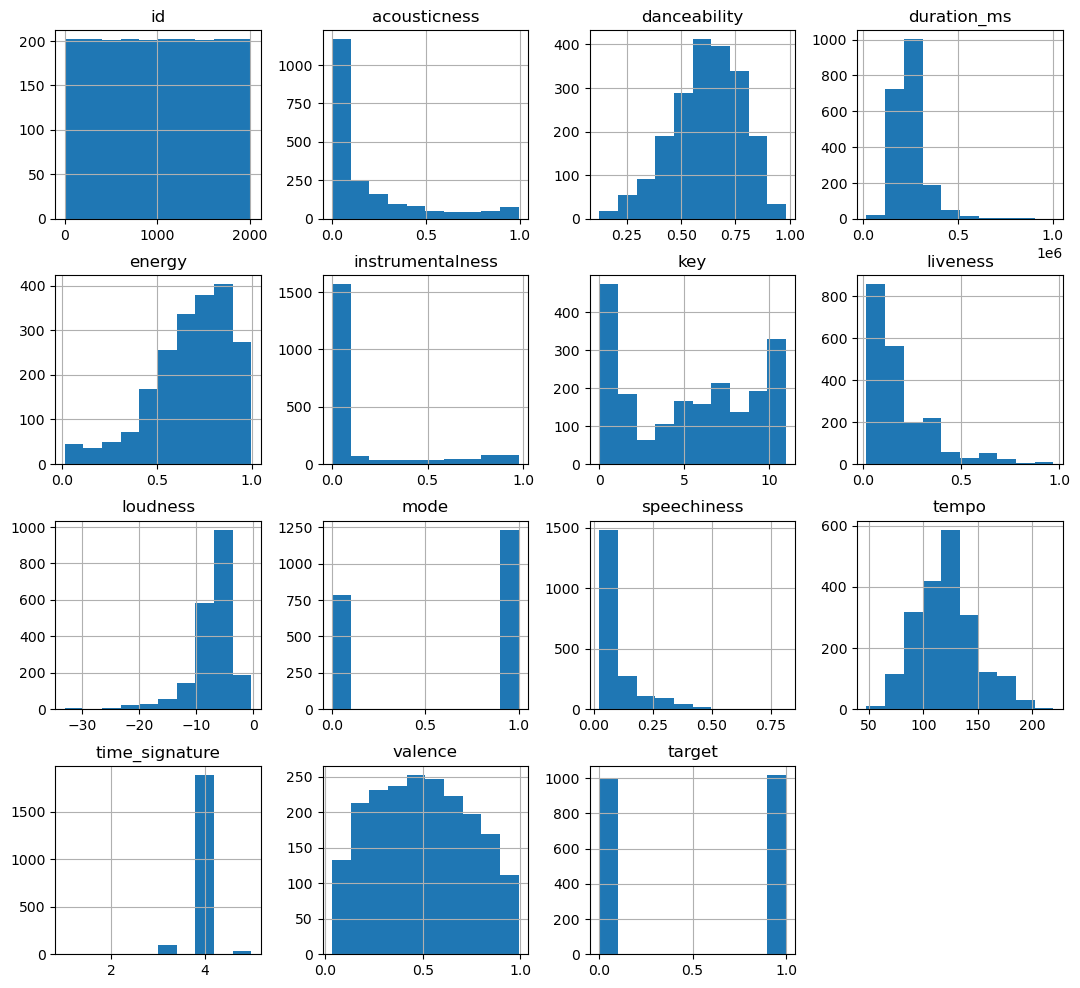

In [9]:
# Distribuição dos dados
df_original.hist(figsize=(13, 12))

<AxesSubplot:>

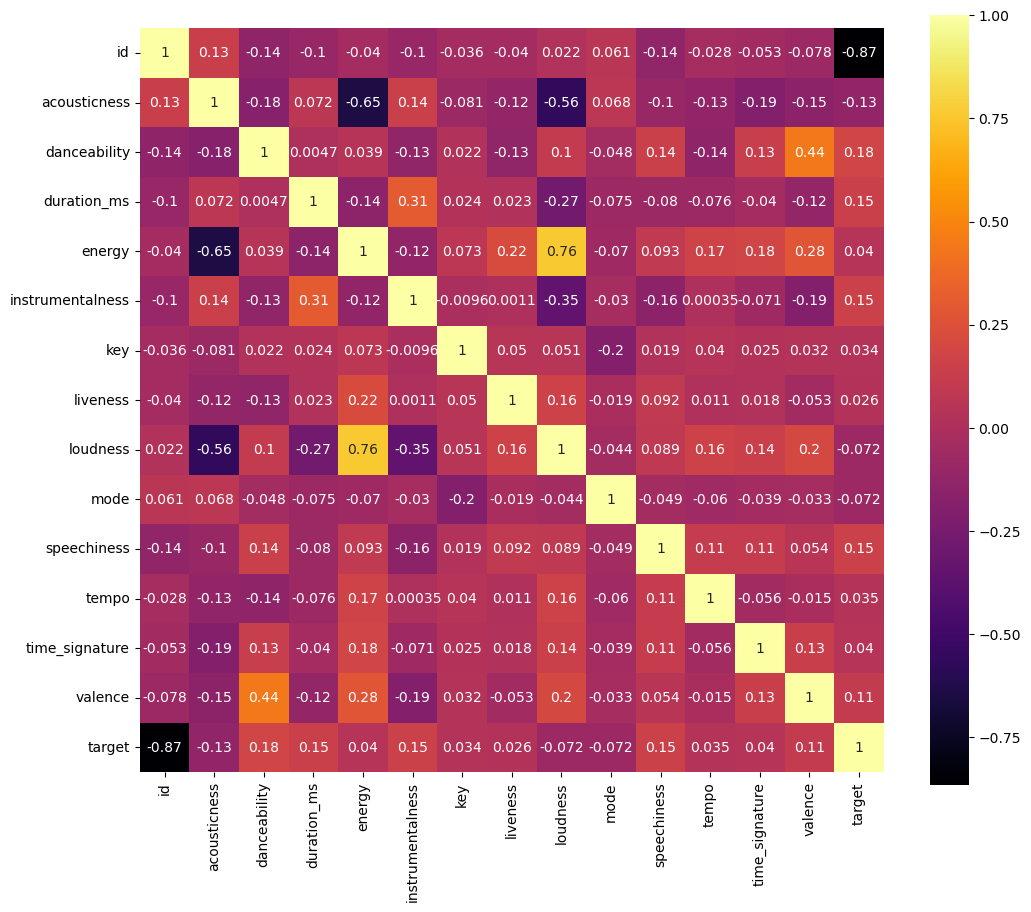

In [10]:
# Observando a correlação linear entre as variáveis numéricas.
corr = df_original.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')
# Nenhuma correlação alta diretamente 

## Preparação dos dados

In [11]:
# Transformando os dados categóricos de texto para numérico para serem usados na rede neural.
lb = LabelEncoder()

df_model = df_original.copy()
df_model["artist"] = lb.fit_transform(df_model["artist"])
df_model["song_title"] = lb.fit_transform(df_model["song_title"])

In [12]:
# Observando como ficaram os novos dados
df_model.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,1043,449
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,1334,222
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,1906,449
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,1044,95
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,1243,628


In [13]:
# Checando se as novas variáveis possuem alguma correlação com a variável target
corr = df_model.corr()
corr["target"].sort_values(ascending=False)

target              1.000000
danceability        0.176706
speechiness         0.154006
instrumentalness    0.152594
duration_ms         0.146749
valence             0.107930
time_signature      0.040182
energy              0.039688
tempo               0.034732
key                 0.033594
liveness            0.026364
song_title         -0.000058
artist             -0.014588
loudness           -0.072000
mode               -0.072336
acousticness       -0.129627
id                 -0.865969
Name: target, dtype: float64

In [14]:
# Não houve seleção de variáveis, pois não foi encontrado nenhuma correlação significante.
X = df_model.drop("target", axis=1)
y = df_model[["target"]]

In [15]:
X.shape

(2017, 16)

In [16]:
# Transformação das variáveis independentes (X) para um range de 0 - 1 para facilitar o processamento da rede.
min_max_scaler = MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)

In [17]:
# Divisão do dataset em treino e teste. Dataset de teste com 20%.
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.20, random_state=42)

## Criação do primeiro modelo

Epoch 1/900


2022-10-27 23:09:07.435044: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


51/51 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5679 - val_loss: 0.6215 - val_accuracy: 0.8020
Epoch 2/900
51/51 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.8580 - val_loss: 0.3001 - val_accuracy: 0.9703
Epoch 3/900
51/51 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.9585 - val_loss: 0.1869 - val_accuracy: 0.9851
Epoch 4/900
 1/51 [..............................] - ETA: 0s - loss: 0.2368 - accuracy: 0.9375

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


51/51 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.9746 - val_loss: 0.1415 - val_accuracy: 0.9851
Epoch 5/900
51/51 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9727 - val_loss: 0.1325 - val_accuracy: 0.9703
Epoch 6/900
51/51 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.9746 - val_loss: 0.1033 - val_accuracy: 0.9827
Epoch 7/900
51/51 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9839 - val_loss: 0.0728 - val_accuracy: 0.9926
Epoch 8/900
51/51 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9839 - val_loss: 0.1445 - val_accuracy: 0.9505
Epoch 9/900
51/51 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9758 - val_loss: 0.0630 - val_accuracy: 0.9876
Epoch 10/900
51/51 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9888 - val_loss: 0.0501 - val_accuracy: 0.9975
Epoch 11/900
51/51 [====

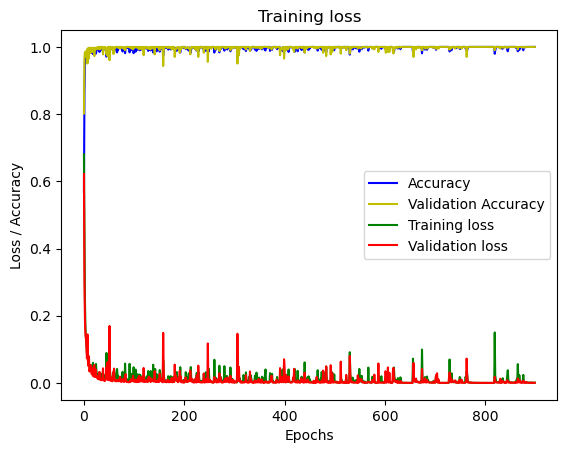

In [18]:
"""
    Essa configuração de rede neural teve um bom desempenho em comparação com as anteriores.
    Camadas escondidas e neurônios escolhidos sem critério. Apenas seguindo padrões da comunidade.
    Camada de saída com a função de ativação "sigmoid" para realizar a classificação binária (0 e 1)
"""
model_1 =  Sequential(
    [
        Dense(8, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ]
)
"""
    Loss: BinaryCrossentropy - Função usada para classificação binária.
    Optimizer: Adam com o learning rate controlado com 0.01
    Metrics: Accuracy
"""
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)
"""
    epochs: 1000 - valor escolhido com base na diminuição do loss.
"""
model_1.fit(
    X_train,y_train,
    epochs=900,
    validation_data=(X_test, y_test)
)
# Validando acurácia e o loss
plot_lost_history(model_1.history)

### Análise do modelo

In [25]:
y_hat = model_1.predict(X_test) # Predição com as variáveis independentes do dataset de teste
predicted = append_to_binary_results(y_hat, 0.55) # Transformando a probabilidade em valores binários (0, 1)
predicted = predicted.numpy().flatten()
report(y_test, predicted) # Gerando report com a qualidade das predições.

13/13 [==============================] - 0s 780us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       198

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



In [26]:
# vendo os acertos e os erros modelo 
_confusion_matrix(y_test, predicted)

[[206   0]
 [  0 198]]


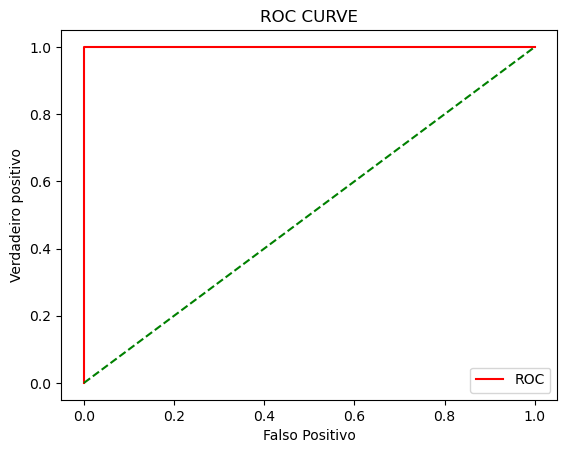

In [27]:
# Observando o acerto do modelo através da curva ROC
plot_roc_curve(y_test, predicted)

## Criação do segundo modelo

Epoch 1/1000


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


51/51 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.7334 - val_loss: 0.3513 - val_accuracy: 0.9109
Epoch 2/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9312 - val_loss: 0.1264 - val_accuracy: 0.9604
Epoch 3/1000
 1/51 [..............................] - ETA: 0s - loss: 0.1802 - accuracy: 0.9375

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


51/51 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9640 - val_loss: 0.0904 - val_accuracy: 0.9777
Epoch 4/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9733 - val_loss: 0.0631 - val_accuracy: 0.9827
Epoch 5/1000
51/51 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9771 - val_loss: 0.0535 - val_accuracy: 0.9876
Epoch 6/1000
51/51 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9746 - val_loss: 0.0484 - val_accuracy: 0.9926
Epoch 7/1000
51/51 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9870 - val_loss: 0.0542 - val_accuracy: 0.9752
Epoch 8/1000
51/51 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9845 - val_loss: 0.0508 - val_accuracy: 0.9777
Epoch 9/1000
51/51 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9882 - val_loss: 0.0345 - val_accuracy: 0.9975
Epoch 10/1000
51/51

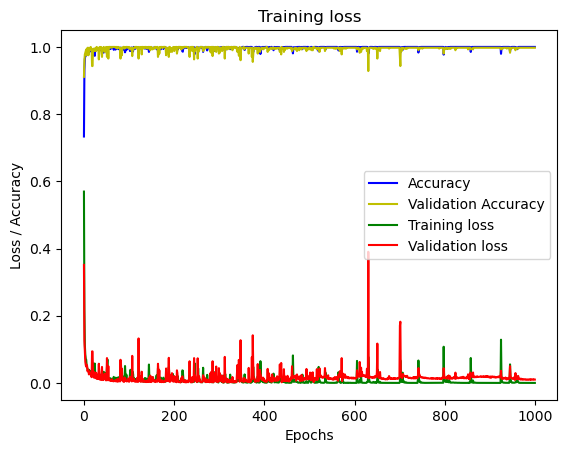

In [28]:
"""
    Modelo 2 - Nova configuração de rede escolhida sem critério. Apenas testando algumas formas diferentes.
    Camadas escondidas e neurônios escolhidos sem critério. Apenas seguindo padrões da comunidade.
    Camada de saída com a função de ativação "sigmoid" para realizar a classificação binária (0 e 1)
"""
model_2 =  Sequential(
    [
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ]
)
"""
    Loss: BinaryCrossentropy - Função usada para classificação binária.
    Optimizer: Adam com o learning rate controlado de 0.01
    Metrics: Accuracy
"""
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)
"""
    epochs: 1000 valor escolhido com base na diminuição do loss.
"""
model_2.fit(
    X_train,y_train,
    epochs=1000,
    validation_data=(X_test, y_test)
)
# Validando acurácia e o loss
plot_lost_history(model_2.history)

### Análise do modelo

In [29]:
y_hat = model_2.predict(X_test)
predicted = append_to_binary_results(y_hat, 0.55)
predicted = predicted.numpy().flatten()
report(y_test, predicted)

13/13 [==============================] - 0s 596us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       0.99      1.00      1.00       198

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



In [30]:
_confusion_matrix(y_test, predicted)

[[205   1]
 [  0 198]]


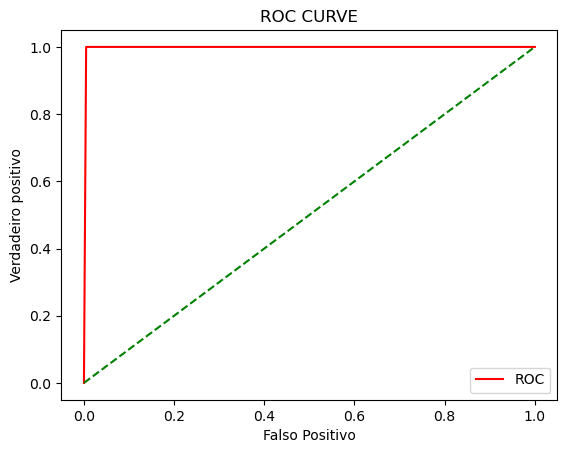

In [31]:
plot_roc_curve(y_test, predicted)

## Conclusão

Embora variáveis independentes (X) não apresentassem uma correlação forte com a variável dependente (y), foi posível gerar ótimos modelos com configurações de rede neural diferentes.

Os modelos foram validados com o dataset de teste e as predições ficaram extremamente precisas e o loss extremamente baixo.